$$
\text{Data Cleaning Project} \, \textbf{Group 4}
$$

$$
\text{My Variable of interest is sales.}\\ 
\text{ i have tried to analyze sales with some trends,} \\ 
\text{cleaning texts and outliers handling functions,}\\ 
\text{missing Values handling and vizualizations with Summary Table}
$$

the dataset is Data `Co-Supply Chain DAtaset`, it deals with sales in particular business across `Puerto Rico` and `United States` in 2015-2018

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import plotly.express as px

In [3]:
data = pd.read_csv("DataCoSupplyChainDataset.csv", encoding = "latin1", low_memory=False)
data.head(n = 10)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class
5,TRANSFER,6,4,18.580000,294.980011,Shipping canceled,0,73,Sporting Goods,Tonawanda,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/19/2018 11:03,Standard Class
6,DEBIT,2,1,95.180000,288.420013,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 10:42,First Class
7,TRANSFER,2,1,68.430000,285.140015,Late delivery,1,73,Sporting Goods,Miami,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 10:21,First Class
8,CASH,3,2,133.720001,278.589996,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 10:00,Second Class
9,CASH,2,1,132.149994,275.309998,Late delivery,1,73,Sporting Goods,San Ramon,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 9:39,First Class


In [4]:
print(data.shape)
print(data.columns.to_list())

(180519, 53)
['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City', 'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id', 'Customer Lname', 'Customer Password', 'Customer Segment', 'Customer State', 'Customer Street', 'Customer Zipcode', 'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id', 'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price', 'Product Status', 'shipping d

In [5]:
data.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [ ]:
data.isna().sum()

,0
Type,0
Days for shipping (real),0
Days for shipment (scheduled),0
Benefit per order,0
Sales per customer,0
Delivery Status,0
Late_delivery_risk,0
Category Id,0
Category Name,0
Customer City,0


In [6]:
data["Product Image"]

0              http://images.acmesports.sports/Smart+watch 
1              http://images.acmesports.sports/Smart+watch 
2              http://images.acmesports.sports/Smart+watch 
3              http://images.acmesports.sports/Smart+watch 
4              http://images.acmesports.sports/Smart+watch 
                                ...                        
180514    http://images.acmesports.sports/Field+%26+Stre...
180515    http://images.acmesports.sports/Field+%26+Stre...
180516    http://images.acmesports.sports/Field+%26+Stre...
180517    http://images.acmesports.sports/Field+%26+Stre...
180518    http://images.acmesports.sports/Field+%26+Stre...
Name: Product Image, Length: 180519, dtype: object

In [7]:
data.drop(columns=["Category Id", "Customer Email", "Customer Fname", "Customer Lname", "Order Customer Id",
                   "Order Zipcode", "Product Image", "Customer Password"], inplace=True)

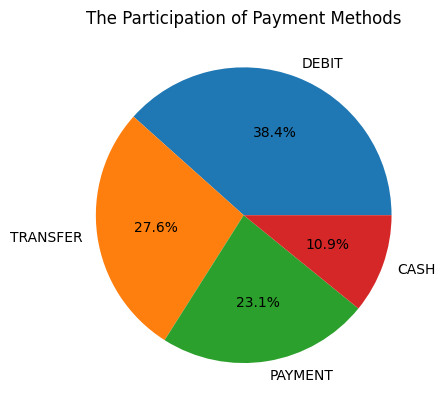

In [8]:
data["Type"].value_counts().plot(kind = "pie", autopct = '%1.1f%%')
plt.ylabel("")
plt.title("The Participation of Payment Methods",loc="center",pad= 5)
plt.show()

In [ ]:
data["Customer Country"].unique()

array(['Puerto Rico', 'EE. UU.'], dtype=object)

In [ ]:
data["Customer Country"] = data["Customer Country"].str.replace(case=False, pat="EE. UU.", repl="United States")

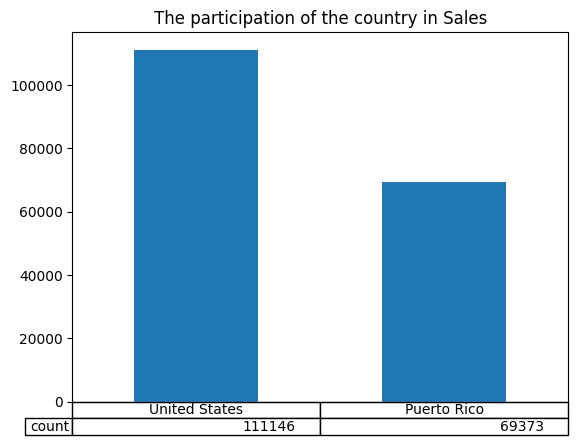

In [ ]:
data["Customer Country"].value_counts().plot(kind = "bar",table=True,layout=(10,10))
plt.xticks([])
plt.title("The participation of the country in Sales")
plt.xlabel("")
plt.show()

In [ ]:
data.columns.to_list()

['Type',
 'Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Sales per customer',
 'Delivery Status',
 'Late_delivery_risk',
 'Category Name',
 'Customer City',
 'Customer Country',
 'Customer Id',
 'Customer Segment',
 'Customer State',
 'Customer Street',
 'Customer Zipcode',
 'Department Id',
 'Department Name',
 'Latitude',
 'Longitude',
 'Market',
 'Order City',
 'Order Country',
 'order date (DateOrders)',
 'Order Id',
 'Order Item Cardprod Id',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Id',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Order Region',
 'Order State',
 'Order Status',
 'Product Card Id',
 'Product Category Id',
 'Product Description',
 'Product Name',
 'Product Price',
 'Product Status',
 'shipping date (DateOrders)',
 'Shipping Mode']

In [ ]:
data.head(10)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,...,Order State,Order Status,Product Card Id,Product Category Id,Product Description,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,...,Java Occidental,COMPLETE,1360,73,NaN,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,...,Rajastán,PENDING,1360,73,NaN,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,Sporting Goods,San Jose,United States,...,Rajastán,CLOSED,1360,73,NaN,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,Sporting Goods,Los Angeles,United States,...,Queensland,COMPLETE,1360,73,NaN,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,...,Queensland,PENDING_PAYMENT,1360,73,NaN,Smart watch,327.75,0,1/15/2018 11:24,Standard Class
5,TRANSFER,6,4,18.580000,294.980011,Shipping canceled,0,Sporting Goods,Tonawanda,United States,...,Queensland,CANCELED,1360,73,NaN,Smart watch,327.75,0,1/19/2018 11:03,Standard Class
6,DEBIT,2,1,95.180000,288.420013,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,...,Guangdong,COMPLETE,1360,73,NaN,Smart watch,327.75,0,1/15/2018 10:42,First Class
7,TRANSFER,2,1,68.430000,285.140015,Late delivery,1,Sporting Goods,Miami,United States,...,Guangdong,PROCESSING,1360,73,NaN,Smart watch,327.75,0,1/15/2018 10:21,First Class
8,CASH,3,2,133.720001,278.589996,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,...,Guangdong,CLOSED,1360,73,NaN,Smart watch,327.75,0,1/16/2018 10:00,Second Class
9,CASH,2,1,132.149994,275.309998,Late delivery,1,Sporting Goods,San Ramon,United States,...,Guangdong,CLOSED,1360,73,NaN,Smart watch,327.75,0,1/15/2018 9:39,First Class


In [ ]:
data["order date (DateOrders)"] = pd.to_datetime(data["order date (DateOrders)"])
data["ord_year"] = data["order date (DateOrders)"].dt.year

In [ ]:
sales_trend = data.groupby(["ord_year", "Customer Country"])["Sales"].agg("mean").reset_index()
type_y = data.groupby(["Type", "ord_year"])["Sales"].mean().reset_index()

In [ ]:
px.line(x = sales_trend["ord_year"], y = sales_trend["Sales"], color=sales_trend["Customer Country"], line_group=None)

In [ ]:
px.line(x = type_y["ord_year"], y = type_y["Sales"], color = type_y["Type"])

In [ ]:
data["ord_year"].unique()

array(['2018', '2016', '2015', '2017'], dtype=object)

In [ ]:
data["ord_year"] = data["ord_year"].astype(str)

In [ ]:
data["Sales"]

,Sales
0,327.750000
1,327.750000
2,327.750000
3,327.750000
4,327.750000
...,...
180514,399.980011
180515,399.980011
180516,399.980011
180517,399.980011


In [ ]:
def iqr(col):
  iqr = np.quantile(col, q = 0.75) - np.quantile(col, q = 0.25)
  return(iqr)

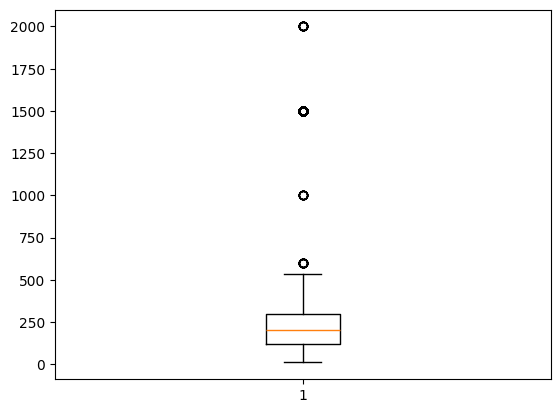

In [ ]:
plt.boxplot(data["Sales"])
plt.show()

In [ ]:
def out_out(data, col_name):
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr_val = q3 - q1
    lower_limit = q1 - 1.5 * iqr_val
    upper_limit = q3 + 1.5 * iqr_val
    outliers_mask = (data[col_name] < lower_limit) | (data[col_name] > upper_limit)

    data.loc[outliers_mask, col_name] = np.nan

    data[col_name] = data[col_name].fillna(data[col_name].mean())

    return data



In [ ]:
numeric_cols = data.select_dtypes(include=[np.number])
for i in numeric_cols:
  out_out(data, i)

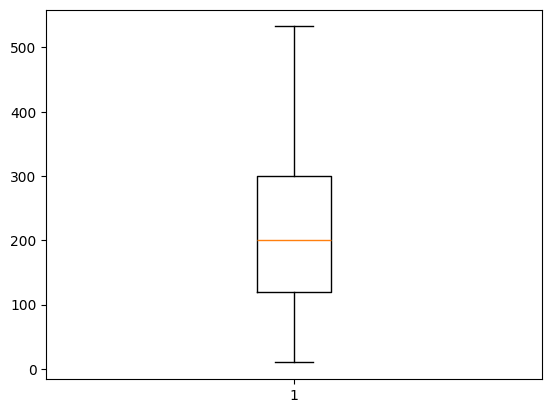

In [ ]:
plt.boxplot(data["Sales"])
plt.show()

$$
\text{Null Values Removal Function}
$$

In [ ]:
def null_free(data, col_name):
  data[col_name] = data[col_name].fillna(data[col_name].mean())
  return(data)


$$
\text{Filling all The Null values By Mean Because i am 100% sure that there's no Outlier}
$$

In [ ]:
for i in numeric_cols:
  null_free(data, i)

In [ ]:
sales_trend = data.groupby(["ord_year", "Customer Country"])["Sales"].agg("mean").reset_index()
sales_trend

,ord_year,Customer Country,Sales
0,2015,Puerto Rico,197.449382
1,2015,United States,196.687295
2,2016,Puerto Rico,197.115819
3,2016,United States,196.452604
4,2017,Puerto Rico,209.609348
5,2017,United States,210.850158
6,2018,Puerto Rico,156.592989
7,2018,United States,155.987518


In [ ]:
px.line(x = sales_trend["ord_year"], y = sales_trend["Sales"], color=sales_trend["Customer Country"], line_group=None)

In [ ]:
type_y = data.groupby(["Type", "ord_year"])["Sales"].mean().reset_index()
type_y

,Type,ord_year,Sales
0,CASH,2015,198.516397
1,CASH,2016,198.181591
2,CASH,2017,210.970264
3,CASH,2018,151.011460
4,DEBIT,2015,197.161899
5,DEBIT,2016,195.330391
6,DEBIT,2017,209.154722
7,DEBIT,2018,153.800664
8,PAYMENT,2015,196.243792
9,PAYMENT,2016,197.681207


In [ ]:
px.line(x = type_y["ord_year"], y = type_y["Sales"], color = type_y["Type"])

In [ ]:
import scipy.stats as stats

In [ ]:
stats.ttest_1samp(a=data["Sales"], popmean=100)

TtestResult(statistic=np.float64(373.2401073899284), pvalue=np.float64(0.0), df=np.int64(180518))

In [ ]:
sales_usa = data[data["Customer Country"] == "Puerto Rico"]["Sales"]
sales_uk = data[data["Customer Country"] == "United States"]["Sales"]
t_stat, p_val = stats.ttest_ind(a=sales_usa, b=sales_uk, equal_var=True)
print(f"P-value: {p_val}")

P-value: 0.6547579281157951


In [ ]:
data.columns.to_list()

['Type',
 'Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Sales per customer',
 'Delivery Status',
 'Late_delivery_risk',
 'Category Name',
 'Customer City',
 'Customer Country',
 'Customer Id',
 'Customer Segment',
 'Customer State',
 'Customer Street',
 'Customer Zipcode',
 'Department Id',
 'Department Name',
 'Latitude',
 'Longitude',
 'Market',
 'Order City',
 'Order Country',
 'order date (DateOrders)',
 'Order Id',
 'Order Item Cardprod Id',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Id',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Order Region',
 'Order State',
 'Order Status',
 'Product Card Id',
 'Product Category Id',
 'Product Description',
 'Product Name',
 'Product Price',
 'Product Status',
 'shipping date (DateOrders)',
 'Shipping Mode',
 'ord_year']

<Axes: xlabel='Product Price', ylabel='Sales'>

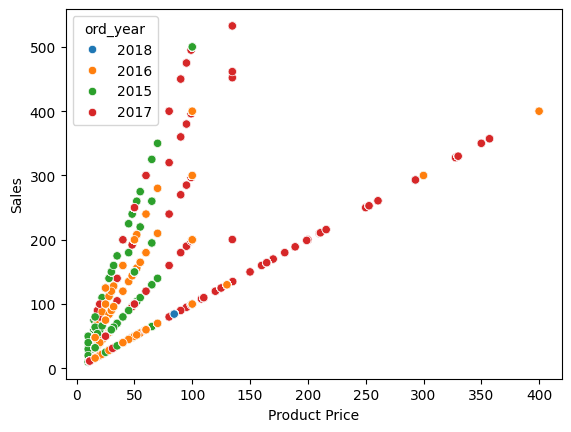

In [ ]:
sns.scatterplot(y=data["Sales"], x = data["Product Price"], hue = data["ord_year"])